In [13]:
import pandas as pd

class Mamdani_FIS:
    def __init__(self,numberOfMembershipFunctionInput = 5,numberOfMembershipFunctionOutput = 9, maxOfVelocity=120, maxOfDistance=1000, maxOfPedal = 45):
        self.numberOfMembershipFunctionInput = numberOfMembershipFunctionInput
        self.numberOfMembershipFunctionOutput = numberOfMembershipFunctionOutput
        self.maxOfVelocity = maxOfVelocity
        self.maxOfDistance = maxOfDistance
        self.maxOfPedal = maxOfPedal
        self.data = self.get_data()


    def get_data(self):
        file_path = '/content/Fuzzy_Rules_13x13MF.xlsx'
        data = pd.read_excel(file_path)
        return data


    # Define parameters for membership functions
    def get_parameters_MFs(self, numberOfMFs, maxValue):
        step=maxValue/(numberOfMFs-1)
        parameters_MFs=[]
        for i in range(numberOfMFs):
           if(i==0):
              index=[0,0,1*step]
           elif(i==numberOfMFs-1):
              index=[(i-1)*step, i*step, i*step]
           else:
              index=[(i-1)*step, i*step, (i+1)*step]
           parameters_MFs.append(index)
        return  parameters_MFs


    # Define membership functions
    def triangular(self, x, listParameters):
        a, b, c = listParameters[0],listParameters[1],listParameters[2]
        if a <= x <= b:
            return (x - a) / (b - a)
        elif b < x <= c:
            return (c - x) / (c - b)
        else:
            return 0.0


    def fill_rules_table_with_MFs_Inputs(self,input1, input2):
        parameters_MFs_Velocity=self.get_parameters_MFs(numberOfMembershipFunctionInput,maxOfVelocity)
        parameters_MFs_Distance=self.get_parameters_MFs(numberOfMembershipFunctionInput,maxOfDistance)
        #print(len(parameters_MFs_Velocity))
        #print(parameters_MFs_Distance)
        for i in range(numberOfMembershipFunctionInput*numberOfMembershipFunctionInput):
           #print(i,"data",self.data.iloc[i, 0]-1)
           listParameters1 = parameters_MFs_Velocity[self.data.iloc[i, 0]-1] # that -1 is for Membership Functions to be in a true indexing in python, for example:2 is Low Velocity and its index on that method is 1.
           listParameters2 = parameters_MFs_Distance[self.data.iloc[i, 1]-1]
           #print(i,"P1:",self.data.iloc[i,0]-1, parameters_MFs_Velocity,"Done")
           MF_value1 = self.triangular(input1,listParameters1)
           MF_value2 = self.triangular(input2,listParameters2)
           self.data.iloc[i, 3] = MF_value1
           self.data.iloc[i, 4] = MF_value2


    def inference_product(self):
        product_column = self.data.iloc[:, 3] * self.data.iloc[:, 4]
        self.data.iloc[:, 5] = product_column


    def inference_minimum(self):
        min_values = self.data.iloc[:, [3, 4]].min(axis=1)
        self.data.iloc[:, 5] = min_values


    def fill_rules_table_with_Center_MFs_Output(self, numberOfMFs, maxValue):
        parameters_MFs_Pedal=self.get_parameters_MFs(numberOfMembershipFunctionOutput,maxOfPedal)
        for i in range(numberOfMembershipFunctionInput*numberOfMembershipFunctionInput):
           listParameters1 = parameters_MFs_Pedal[self.data.iloc[i, 2]-1]
           # print(data.iloc[i, 0])
           if(i==0):
              centerOfMF=(listParameters1[1]+listParameters1[2])/2.0
           elif(i==numberOfMFs-1):
              centerOfMF=(listParameters1[0]+listParameters1[1])/2.0
           else:
              centerOfMF=listParameters1[1]
           self.data.iloc[i, 6] = centerOfMF


    def get_output(self, input1, input2):
        self.fill_rules_table_with_MFs_Inputs(input1, input2)
        self.inference_product()
        #self.inference_minimum()
        self.fill_rules_table_with_Center_MFs_Output(numberOfMembershipFunctionOutput, maxOfPedal)
        sum_column_6 = (self.data.iloc[:, 6] * self.data.iloc[:, 5]).sum()
        sum_column_5 = self.data.iloc[:, 5].sum()
        return sum_column_6/sum_column_5

    def get_rules_table(self):
        return self.data

numberOfMembershipFunctionInput=13
numberOfMembershipFunctionOutput=23
maxOfVelocity=120
maxOfDistance=1000
maxOfPedal = 45

# Create an instance of Mamdani_FIS
fis = Mamdani_FIS()
pedal = fis.get_output(110, 10)
print(pedal)
fis.get_rules_table()


24.3


,Velocity,Distance,Pedal,MF_Vel,MF_Dis,Product,Center_Pedal
0,1,1,23,0,0.88,0.0,45.000000
1,1,2,23,0,0.12,0.0,45.000000
2,1,3,22,0,0.00,0.0,42.954545
3,1,4,21,0,0.00,0.0,40.909091
4,1,5,20,0,0.00,0.0,38.863636
...,...,...,...,...,...,...,...
164,13,9,4,0,0.00,0.0,6.136364
165,13,10,3,0,0.00,0.0,4.090909
166,13,11,2,0,0.00,0.0,2.045455
167,13,12,1,0,0.00,0.0,0.000000


Streaming output truncated to the last 5000 lines.
70 data 6
71 data 6
72 data 6
73 data 6
74 data 6
75 data 6
76 data 6
77 data 6
78 data 7
79 data 7
80 data 7
81 data 7
82 data 7
83 data 7
84 data 7
85 data 7
86 data 7
87 data 7
88 data 7
89 data 7
90 data 7
91 data 8
92 data 8
93 data 8
94 data 8
95 data 8
96 data 8
97 data 8
98 data 8
99 data 8
100 data 8
101 data 8
102 data 8
103 data 8
104 data 9
105 data 9
106 data 9
107 data 9
108 data 9
109 data 9
110 data 9
111 data 9
112 data 9
113 data 9
114 data 9
115 data 9
116 data 9
117 data 10
118 data 10
119 data 10
120 data 10
121 data 10
122 data 10
123 data 10
124 data 10
125 data 10
126 data 10
127 data 10
128 data 10
129 data 10
130 data 11
131 data 11
132 data 11
133 data 11
134 data 11
135 data 11
136 data 11
137 data 11
138 data 11
139 data 11
140 data 11
141 data 11
142 data 11
143 data 12
144 data 12
145 data 12
146 data 12
147 data 12
148 data 12
149 data 12
150 data 12
151 data 12
152 data 12
153 data 12
154 data 12
155 da

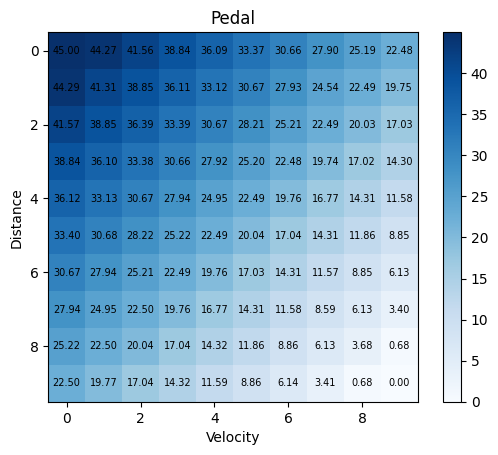

In [8]:
import numpy as np
import matplotlib.pyplot as plt

num=10

samplesVelocity = np.linspace(0.1, maxOfVelocity, num)
samplesDistance = np.linspace(0.1, maxOfDistance, num)

matrix = np.random.rand(num, num)

for i in range(len(matrix)):
    for j in range(len(matrix[0])):
      # print(i,j)
      matrix[i, j] = fis.get_output(samplesVelocity[i], samplesDistance[j])

# Define maximum value
max_value = np.max(matrix)

# Create a new figure and axis
fig, ax = plt.subplots()

# Create a heatmap
heatmap = ax.imshow(matrix, cmap='Blues')

# Add color bar
cbar = plt.colorbar(heatmap)


# Iterate over each cell to annotate the value
for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        ax.text(j, i, f'{matrix[i, j]:.2f}', ha='center', va='center', color='black',fontsize=7)

plt.title('Pedal')
plt.xlabel('Velocity')
plt.ylabel('Distance')

# Show plot
plt.show()
